In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import statsmodels.api as sm

In [ ]:
# Step 2: Load Dataset
df = pd.read_csv("Ice_cream selling data.csv")
df.head()

,Temperature,Ice Cream Sales
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [3]:
df.isnull().sum()

Temperature        0
Ice Cream Sales    0
dtype: int64

In [4]:
df.rename(columns={"Ice Cream Sales": "Ice_Cream_Sales"}, inplace=True)

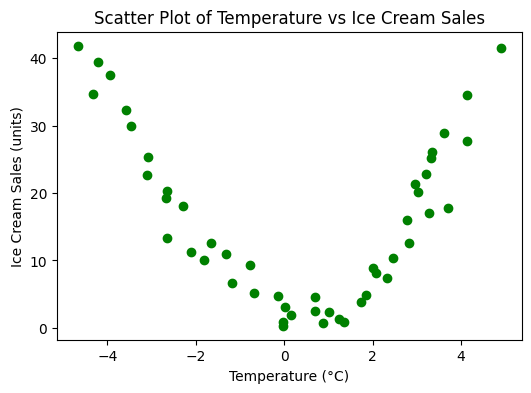

In [5]:
# Step 3: Scatter Plot (Visualization)
plt.figure(figsize=(6,4))
plt.scatter(df["Temperature"], df["Ice_Cream_Sales"], color='green')
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.title("Scatter Plot of Temperature vs Ice Cream Sales")
plt.show()

                 Temperature  Ice_Cream_Sales
Temperature         1.000000        -0.175184
Ice_Cream_Sales    -0.175184         1.000000


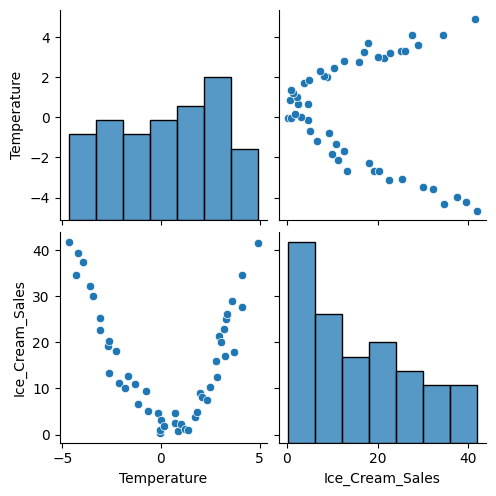

In [16]:
# Step 4: Correlation
print(df.corr())
sns.pairplot(df)
plt.show()

In [ ]:
# Step 5: Define Independent & Dependent Variables
X = df[['Temperature']]   # Independent variable (2D DataFrame)
Y = df['Ice_Cream_Sales']     # Dependent variable (1D Series)

In [ ]:
# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X,Y, test_size=0.25, random_state=42
)
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

Train Shape: (36, 1)
Test Shape: (13, 1)


In [ ]:
# Step 8: Train Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)
score_lin = r2_score(y_test, y_pred_lin)

print("Simple Linear Regression R2 Score:", score_lin)

Simple Linear Regression R2 Score: -0.24630892029337303


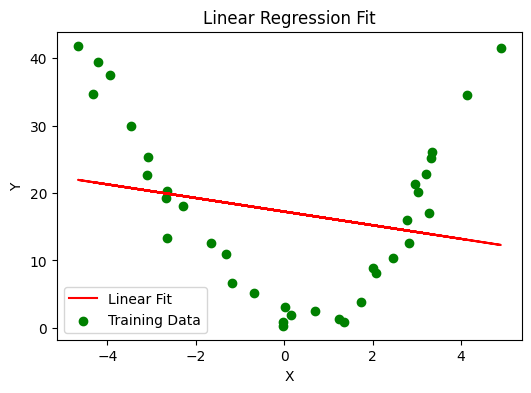

In [9]:
# Plot Linear Fit
plt.figure(figsize=(6,4))
plt.plot(X_train, lin_reg.predict(X_train), color='red', label="Linear Fit")
plt.scatter(X_train, y_train, color='green', label="Training Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

In [ ]:
# Step 9: Polynomial Feature Transformation (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print("First 5 Polynomial Features:\n", X_train_poly[:5])

First 5 Polynomial Features:
 [[ 1.         -2.67246083  7.14204687]
 [ 1.         -3.94966109 15.59982272]
 [ 1.         -3.10844012  9.66239999]
 [ 1.          3.21136614 10.31287251]
 [ 1.          3.27004407 10.69318821]]


In [ ]:
# Step 10: Train Polynomial Regression Model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# Step 11: Evaluate Polynomial Regression
y_pred_poly = poly_reg.predict(X_test_poly)
score_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression R2 Score:", score_poly)

Polynomial Regression R2 Score: 0.8697223942969939


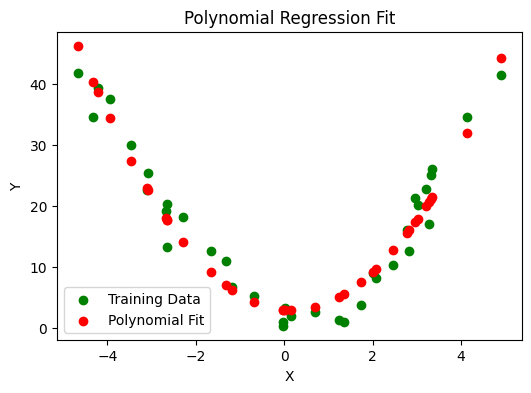

In [ ]:
# Step 12: Visualization of Polynomial Fit
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, color="green", label="Training Data")
plt.scatter(X_train, poly_reg.predict(X_train_poly), color="red", label="Polynomial Fit")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.show()

In [ ]:
# Step 13: Predict Ice Cream Sales for a new Temperature
new_temp = 5
# Step 10a: Transform the new value to polynomial features
new_temp_poly = poly.transform([[new_temp]])  # Always pass 2D array
# Step 10b: Use the trained model to predict
predicted_sales = poly_reg.predict(new_temp_poly)
print(f"Predicted Ice Cream Sales at {new_temp}°C: {predicted_sales[0]:.2f} units")

Predicted Ice Cream Sales at 5°C: 46.05 units


d:\Skills\Data_Science\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
